Deep Learning을 공부하는 사람들이면 잘 아는 Framework.  <br>
근데 이론만 알고 만져본 적이 없음.

In [1]:
# 모듈 로딩
import tensorflow as tf

In [3]:
x = [[2]]
m = tf.matmul(x, x) # 곱연산.
print(f'Hello, {m}')
print(type(m)) # Tensor 자료형.

Hello, [[4]]
<class 'tensorflow.python.framework.ops.EagerTensor'>


    텐서플로의 수학연산은 파이썬 객체와 NumPy배열을 tf.Tensor 객체로 변환함.
    tf.Tensor.numpy method는 객체 값을 ndarray로 변환함.

In [6]:
a = tf.constant([[1, 2], 
                 [3, 4]]) # 2차원 List --> tf.Tensor 로 변환
print(a)

# Broadcasting 또한 가능. 작은 텐서와 큰 텐서의 연산 시, 큰 텐서쪽으로 맞게 자동으로 확장.
b = tf.add(a, 1) # 각 요소에 +1.
print(b)

# 연산자 Overloading 가능.
print(a * b) # 요소 별 연산.

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [8]:
# numpy 연산을 수행할 수도 있음.
import numpy as np
c = np.multiply(a, b)
print(c)
print(type(c)) # 연산 결과는 당연히 ndarray.

# Tensor로 부터 numpy ndarray 값을 구할 수 있음.
print(a.numpy())
print(type(a.numpy()))

[[ 2  6]
 [12 20]]
<class 'numpy.ndarray'>
[[1 2]
 [3 4]]
<class 'numpy.ndarray'>


## Tensor

<br>

- Python의 숫자 및 문자열 같이 변경을 못함.
- 텐서의 내용을 업데이트 할 수 없다는 의미.
- 오로지 새로운 텐서만을 만들 수 있음.

In [10]:
# 기본 텐서 - 스칼라 or 순위-0 텐서. 축이 없음.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

# 기본 텐서 - 벡터 or 순위-1 텐서. 축이 1개. 우리가 아는 그 벡터 형태.
rank_1_tensor = tf.constant([2, 3, 4])
print(rank_1_tensor)

# 기본 텐서 - 행렬 or 순위-2 텐서. 축이 2개. 우리가 아는 그 행렬 형태.
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]])
print(rank_2_tensor)

# 이를 애초에 만들때 int형이 아닌 float형으로 만들고 싶다면 끝에 dtype 인자를 지정해주면 된다.
rank_1_tensor_2 = tf.constant([2, 3, 4], dtype=tf.float16)
print(rank_1_tensor_2)

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([2 3 4], shape=(3,), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)
tf.Tensor([2. 3. 4.], shape=(3,), dtype=float16)


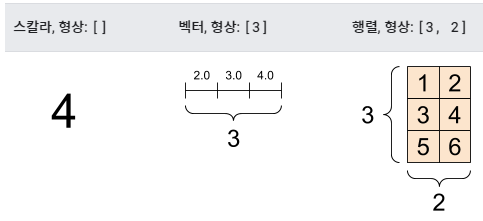  <br>
        그림으로 보면 좀 더 이해하기 쉽다.

In [11]:
# 축이 더 많아질 수 있음. 순위-3 텐서를 보자.
rank_3_tensor = tf.constant([
    [[1,2,3,4,5],
     [6,7,8,9,10]],
    [[11,12,13,14,15],
     [16,17,18,19,20]],
    [[21,22,23,24,25],
     [26,27,28,29,30]]
])
print(rank_3_tensor) # 다차원 list, 다차원 ndarray처럼 생각하면 됨.

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[11 12 13 14 15]
  [16 17 18 19 20]]

 [[21 22 23 24 25]
  [26 27 28 29 30]]], shape=(3, 2, 5), dtype=int32)


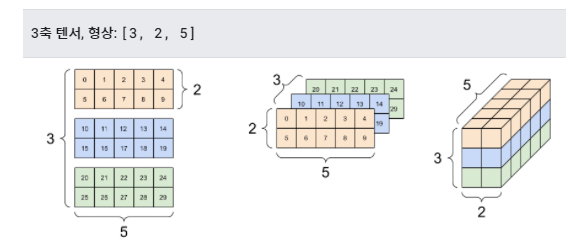

In [14]:
rank_1_tensor_2.numpy() # 바로 ndarray로 변환이 가능함.

array([2., 3., 4.], dtype=float16)

- float, int형 뿐만 아닌 복소수, 문자열 형태도 될 수 있음.
- 텐서는 기본적으로 **직사각형** 형태. 각 축을 따라 모든 요소의 크기가 같아야 한다.
    - 비정형, 희소 텐서의 경우는 형태가 다를 수 있음.

In [18]:
# 간단한 사칙연산이 가능.
a = tf.constant([[1, 2], 
                 [3, 4]])
b = tf.constant([[1, 1],
                [1, 1]]) # tf.ones([2,2]) 로도 만들 수 있음.

print(tf.add(a, b), '\n')
print(tf.multiply(a, b), '\n') # 각 요소끼리만 곱
print(tf.matmul(a, b), '\n') # 행렬 곱

# 아래 처럼도 할 수 있음.
print(a + b, '\n')
print(a * b, '\n') # 각 요소끼리 곱
print(a @ b, '\n') # 행렬 곱

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



## Tensor의 형상 정보

<br>

- 형상 : 텐서의 각 차원 길이 (요소의 갯수)
- 순위 : 차원의 수. 스칼라는 순위가 0, 벡터의 순위는 1, 행렬은 2.
- 축 or 차원 : 텐서의 특정 차원
- 크기 : 텐서의 총 항목 수, 곱 형상 벡터.

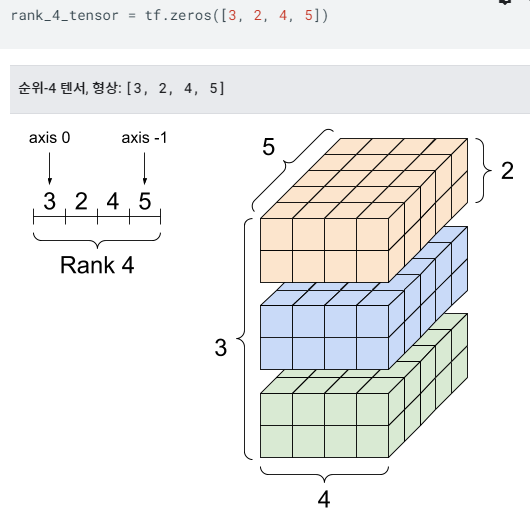

In [19]:
rank_4_tensor = tf.zeros([3,2,4,5]) # 3*2*4*5 크기의 0으로 채워진 4차원 텐서 정의.

print('텐서 생김새 : ', rank_4_tensor)
print('각 원소의 type : ', rank_4_tensor.dtype)
print('차원 수 : ', rank_4_tensor.ndim)
print('텐서의 형태(형상) : ', rank_4_tensor.shape)
print('텐서의 0번째 축 형태(형상) : ', rank_4_tensor.shape[0])
print('텐서의 마지막번째 축 형태(형상)', rank_4_tensor.shape[-1])
print('총 원소의 수 : ', tf.size(rank_4_tensor).numpy())

텐서 생김새 :  tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]], shape=(3, 2, 4, 5), dtype=float32)
각 원소의 type :  <dtype: 'float32'>
차원 수 :  4
텐서의 형태(형상) :  (3, 2, 4, 5)
텐서의 0번째 축 형태(형상) :  3
텐서의 마지막번째 축 형태(형상) 5
총 원소의 수 :  120


Rank 4의 경우 일반적인 축의 순서는 다음과 같다.
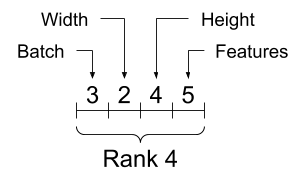

## Tensor Indexing

<br>

- **list indexing, numpy indexing의 기본 규칙을 따름.**
    - 0부터 시작
    - 음수 인덱스는 끝에서부터 거꾸로 계산
    - 콜론(:)은 slicing에 사용. **start:stop:step**

In [22]:
sampleTensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])

# index 번호 접근
print('첫번째 요소 : ', sampleTensor[0].numpy())
print('두번째 요소 : ', sampleTensor[1].numpy())
print('마지막 요소 : ', sampleTensor[-1].numpy())

# indexing을 통한 접근
print('모든 요소 : ', sampleTensor[:].numpy())
print('3번째 부터 8번째 전 까지 : ', sampleTensor[2:7].numpy())
print('홀수번째 요소 만 : ', sampleTensor[::2].numpy())

첫번째 요소 :  0
두번째 요소 :  1
마지막 요소 :  34
모든 요소 :  [ 0  1  1  2  3  5  8 13 21 34]
3번째 부터 8번째 전 까지 :  [1 2 3 5 8]
홀수번째 요소 만 :  [ 0  1  3  8 21]


In [28]:
print(rank_2_tensor.numpy())

# 다축 인덱싱?
# 2행 2열 요소 접근 --> index는 1,1이 되겠죠?
print(rank_2_tensor[1,1].numpy())

print('두번째 row : ', rank_2_tensor[1, :].numpy())
print('두번째 col : ', rank_2_tensor[:, 1].numpy())
print('마지막 col에서의 첫번째 원소 : ', rank_2_tensor[0, -1].numpy())
print('첫번째 행 제외? : \n', rank_2_tensor[1:, :].numpy())

[[1 2]
 [3 4]
 [5 6]]
4
두번째 row :  [3 4]
두번째 col :  [2 4 6]
마지막 col에서의 첫번째 원소 :  2
첫번째 행 제외? : 
 [[3 4]
 [5 6]]


In [29]:
# 3축 텐서도 마찬가지.
print(rank_3_tensor)

# 모든 위치에서 마지막 특성 선택
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[11 12 13 14 15]
  [16 17 18 19 20]]

 [[21 22 23 24 25]
  [26 27 28 29 30]]], shape=(3, 2, 5), dtype=int32)
tf.Tensor(
[[ 5 10]
 [15 20]
 [25 30]], shape=(3, 2), dtype=int32)


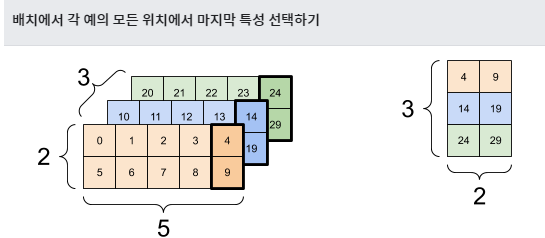

## Tensor shape 조작

In [31]:
var_x = tf.Variable(tf.constant([[1], [2], [3]]))
print(var_x.shape) # shape 함수는 TensorShape 객체를 반환함.
print(var_x.shape.as_list()) # 이를 list로 변환할 수 있음.

(3, 1)
[3, 1]


In [32]:
# 새로운 형태로 바꿀 수가 있다. 데이터 복제가 필요 없어서 구성이 빠르고 저렴함.
reshaped = tf.reshape(var_x, [1,3]) # 이때 전달되는 인자는 list임!!
print(var_x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


In [33]:
# 텐서는 C 처럼 "행 중심" 메모리 순서를 사용함. 
# 평평하게 출력해보면 어떻게 메모리에 배치되어 있는지 알 수 있다.
print(rank_3_tensor)
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[11 12 13 14 15]
  [16 17 18 19 20]]

 [[21 22 23 24 25]
  [26 27 28 29 30]]], shape=(3, 2, 5), dtype=int32)
tf.Tensor(
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30], shape=(30,), dtype=int32)


In [34]:
# reshape을 통해 텐서의 형태를 변환할 수 있음.
print(tf.reshape(rank_3_tensor, [3*2, 5]), '\n') # (3 * 2) * 5 로 변환
print(tf.reshape(rank_3_tensor, [3, -1]), '\n') # 3 * (2 * 5) 로 변환

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]], shape=(3, 10), dtype=int32) 



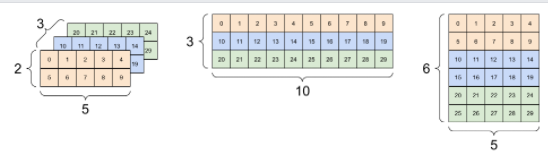

이렇게.

## 비정형 Tensor

<br>

- 비정형 텐서는 정규 텐서로 표현할 수가 없음.
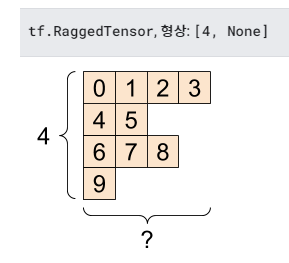

In [35]:
ragged_list = [
    [0,1,2,3],
    [4,5],
    [6,7,8],
    [9,10]
]
try:
    tensor = tf.constant(ragged_list)
except Exception as e:
    print(f'{type(e).__name__} : {e}')

ValueError : Can't convert non-rectangular Python sequence to Tensor.


In [37]:
# 하지만 tf.ragged.constant를 사용해 RaggedTensor를 만들 수 있음.
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)
print(ragged_tensor.shape) # ? 처럼 된 부분 (몇 차원인지 말하기 힘든거)은 None 차원으로 나타남.

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9, 10]]>
(4, None)


## 문자열 Tensor

<br>

- 기존 Tensor와 동일하지만, 안 내용이 문자열임.
- 타입은 tf.string

In [40]:
scala_string_tensor = tf.constant('Hello there')
print(scala_string_tensor)

tensor_of_strings = tf.constant(['Hello there',
                                'Nice to meet you',
                                'How are you?'])
print(tensor_of_strings)

tf.Tensor(b'Hello there', shape=(), dtype=string)
tf.Tensor([b'Hello there' b'Nice to meet you' b'How are you?'], shape=(3,), dtype=string)


    여기서 b 접두사는 tf.string dtype이 유니코드 문자열이 아닌 바이트 문자열 임을 의미.

In [41]:
# tf.strings.split을 통해 자를 수도 있음.
print(tf.strings.split(scala_string_tensor, sep=' '))
print(tf.strings.split(tensor_of_strings)) # 이런 경우는 RaggedTensor가 됨.

tf.Tensor([b'Hello' b'there'], shape=(2,), dtype=string)
<tf.RaggedTensor [[b'Hello', b'there'], [b'Nice', b'to', b'meet', b'you'], [b'How', b'are', b'you?']]>


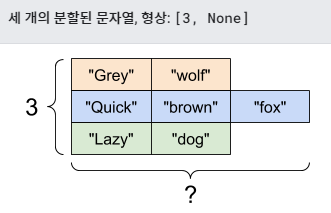

이런 형태.

In [42]:
# 문자형으로 되어있는 숫자를 수치형으로 바꿀 수 있음.
text = tf.constant('1 10 100')
print(tf.strings.to_number(tf.strings.split(text, ' ')))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


## 희소 Tensor

<br>

- 우리가 아는 그 희소행렬. Sparse Matrix.
- 빈 공간이 많은 텐서.

In [44]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, '\n')

# sparse를 dense로 바꿀 수 있다.
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


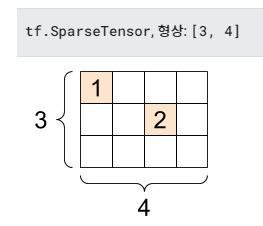
이런 형태.